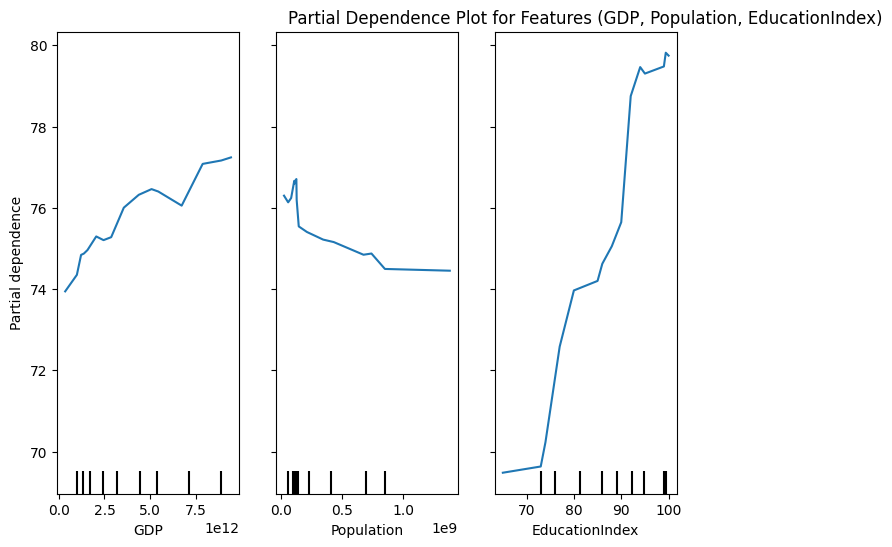

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

data = {
    'GDP': [21.43e12, 14.34e12, 2.87e12, 4.38e12, 5.08e12, 1.57e12, 2.05e12, 0.35e12, 1.37e12, 1.22e12,
            3.56e12, 8.90e12, 6.73e12, 9.43e12, 2.45e12, 1.13e12, 7.88e12, 0.79e12, 5.45e12, 0.99e12],
    'Population': [331002651, 1439323776, 1380004385, 83783942, 126476461, 145934462, 212559417, 59308690,
                   25499884, 128932753, 113000000, 740000000, 850000000, 109000000, 675000000, 455000000,
                   345000000, 123000000, 432000000, 111000000],
    'EducationIndex': [99.0, 87.6, 74.0, 100.0, 99.4, 99.0, 86.0, 73.0, 99.0, 90.0,
                       80.0, 95.0, 85.0, 92.0, 88.0, 70.0, 94.0, 60.0, 77.0, 65.0],
    'LifeExpectancy': [79.5, 76.9, 69.4, 81.2, 84.6, 72.8, 75.2, 64.1, 82.9, 75.4,
                       78.0, 80.5, 70.3, 82.0, 73.5, 65.8, 81.0, 60.4, 74.0, 66.7]
}

df = pd.DataFrame(data)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
feature_names = ["GDP", "Population", "EducationIndex"]
X_train = train_df[feature_names]
y_train = train_df["LifeExpectancy"]
X_test = test_df[feature_names]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 6))
display = PartialDependenceDisplay.from_estimator(model, X_train, features=[0, 1, 2], feature_names=feature_names, ax=ax)

plt.title("Partial Dependence Plot for Features (GDP, Population, EducationIndex)")
plt.show()